# **A/B Testing Evaluation**
## **1.  Goal**

To determine whether the **Test Campaign outperforms the Control Campaign** across key performance metrics:

- Click-Through Rate (CTR)
- Conversion Rate
- Cost per Click (CPC)
- Cost per Purchase (CPP)
## **2. Results**
- Based on statistical evidence, the Test Campaign does ***not fully outperform*** the Control Campaign across the key business performance metrics.

- The Test campaign shows a **statistically significant increase in CTR**, indicating stronger user engagement.

- However, there is **no statistically significant improvement** in Conversion Rate, CPC, CPP


## **3. Method**
- **One-tailed T-test** were conducted to determine whether the observed differences between the Test and Control campaigns are statistically significant.

- **Holm–Bonferroni method** was applied to adjust for multiple hypothesis testing, ensuring that the overall alpha is properly controlled.

## **4. Main Steps**

- **Data Quality Check and Cleaning**: Assessed missing values and removed it.
- **Metric Aggregation**
  - Calculated key performance metrics: CTR, Conversion Rate, CPC, and CPP.
  - Reviewed metric distributions using boxplots.
- **Uplift Analysis**: Calculated percentage uplift between the Test and Control campaigns.
- **Hypothesis Testing**
  - Defined null (H0) and alternative (H1) hypotheses for each metric.
  - Conducted one-tailed t-tests.
  - Applied Holm–Bonferroni correction for multiple comparisons.
  - Determined statistical significance based on the adjusted significance level.


In [1]:
#Import all needed libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

In [2]:
control = pd.read_csv('control_group.csv', sep=';')
test = pd.read_csv('test_group.csv', sep=';')
df = pd.concat([control, test], ignore_index=True)
df.head(5)

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **1. DATA QUALITY CHECK AND DATA CLEANING**

In [3]:
df.info()
#>>There are some null values that need to be removed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        60 non-null     object 
 1   Date                 60 non-null     object 
 2   Spend [USD]          60 non-null     int64  
 3   # of Impressions     59 non-null     float64
 4   Reach                59 non-null     float64
 5   # of Website Clicks  59 non-null     float64
 6   # of Searches        59 non-null     float64
 7   # of View Content    59 non-null     float64
 8   # of Add to Cart     59 non-null     float64
 9   # of Purchase        59 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 4.8+ KB


In [4]:
df = df.dropna()
df.head(5)

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
5,Control Campaign,6.08.2019,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0


In [5]:
df.describe()

,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2435.762712,91775.881356,70868.644068,5682.593220,2321.813559,1900.169492,1087.220339,522.000000
std,376.358795,32465.070636,31023.653515,1754.777559,669.040576,687.263844,430.205246,196.973917
min,1757.000000,22521.000000,10598.000000,2277.000000,1001.000000,848.000000,278.000000,222.000000
25%,2113.500000,68853.500000,43230.000000,4227.500000,1962.500000,1249.000000,848.500000,340.000000
50%,2421.000000,95843.000000,76219.000000,5691.000000,2390.000000,1975.000000,1075.000000,501.000000
75%,2743.000000,117315.000000,95490.500000,7218.500000,2778.500000,2424.000000,1386.500000,693.000000
max,3112.000000,145248.000000,127852.000000,8264.000000,4891.000000,4219.000000,1913.000000,890.000000


## **2. METRIC AGGREGATION**
To determine whether the Test Campaign outperforms the Control Campaign in terms of key performance metrics (Conversion Rate, Cost per Click, Cost per Purchase,Click-through Rate)

In [6]:
df['CTR'] = df['# of Website Clicks'] / df['# of Impressions']
df['Conversion_Rate'] = df['# of Purchase'] / df['# of Website Clicks']
df['CPC'] = df['Spend [USD]'] / df['# of Website Clicks']
df['CPP'] = df['Spend [USD]'] / df['# of Purchase']
df.head(5)

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase,CTR,Conversion_Rate,CPC,CPP
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,0.084835,0.088084,0.324971,3.689320
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0,0.067003,0.063009,0.216646,3.438356
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0,0.049411,0.057160,0.360018,6.298387
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0,0.042057,0.110930,0.632953,5.705882
5,Control Campaign,6.08.2019,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0,0.036928,0.189672,0.765392,4.035340


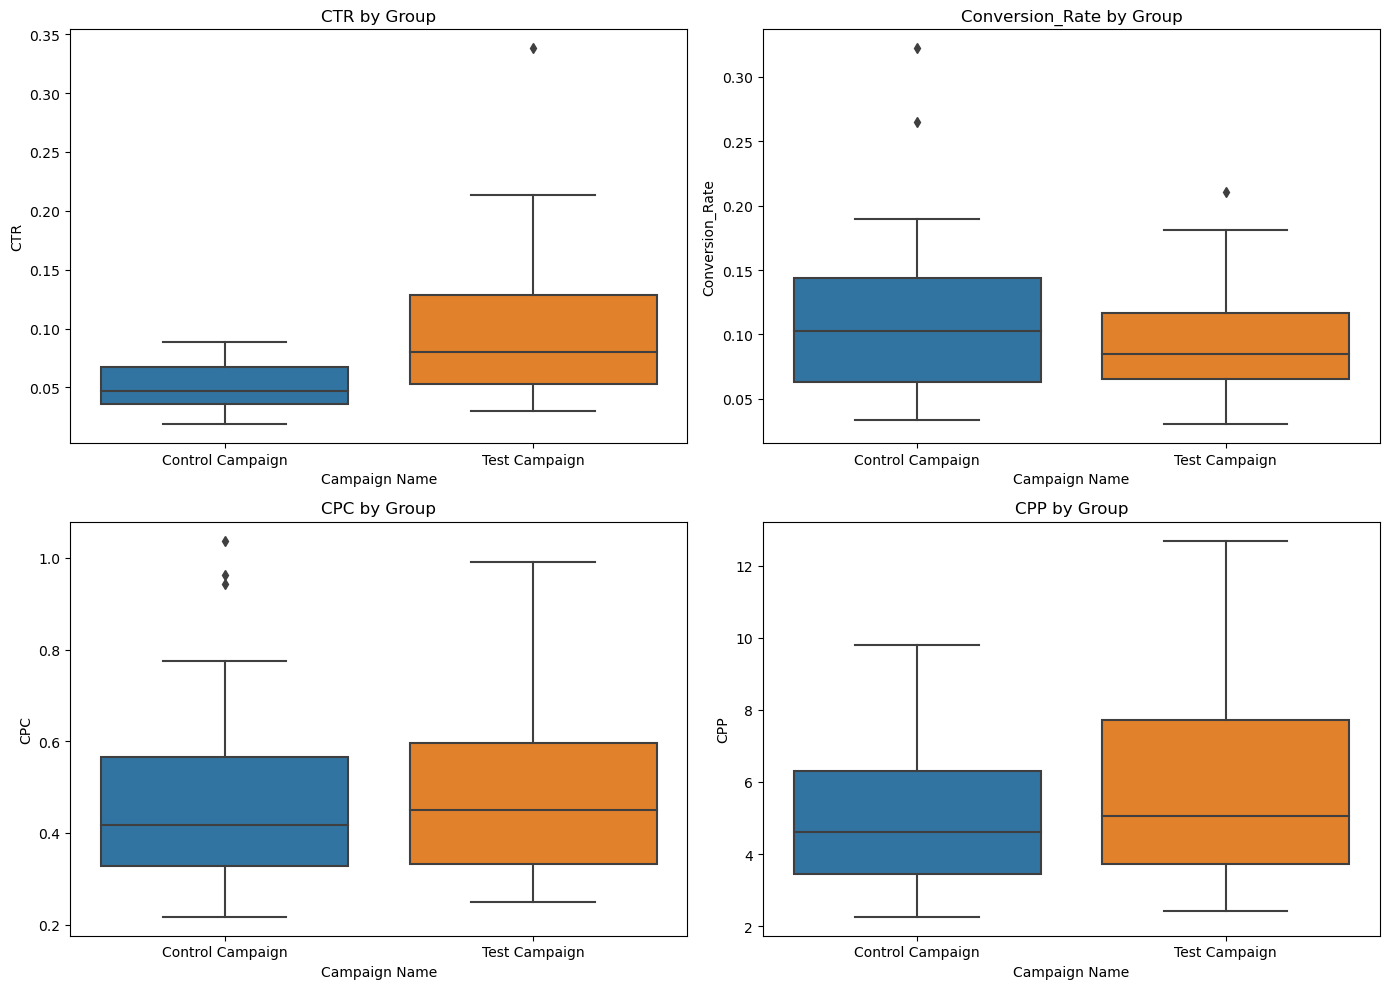

In [7]:
metrics = ['CTR', 'Conversion_Rate', 'CPC', 'CPP']
fig, axes = plt.subplots(2, 2, figsize=(14,10))
axes = axes.flatten()
for i, metric in enumerate(metrics):
    sns.boxplot(x = 'Campaign Name'
                ,y = metric
                ,data = df
                ,ax = axes[i]
                )
    axes[i].set_title(f'{metric} by Group')
plt.tight_layout()
plt.show()

In [8]:
df.groupby('Campaign Name')[['CTR', 'Conversion_Rate', 'CPC', 'CPP']].agg('mean').round(2)

,CTR,Conversion_Rate,CPC,CPP
Campaign Name,,,,
Control Campaign,0.05,0.11,0.49,5.05
Test Campaign,0.10,0.09,0.47,5.90


## **3. HYPOTHESIS**
Since the objective is to determine whether the Test campaign ***outperforms*** the Control campaign, the hypothesis is directional. Therefore, a one-sided test is appropriate.

For performance metrics (CTR, Conversion Rate), we test whether the Test campaign achieves higher values than the Control.
- H0: The Test campaign does not perform better than the Control campaign.
- H1: The Test campaign performs better than the Control campaign.

For cost metrics (CPC, CPP), we test whether the Test campaign achieves lower costs than the Control.
- H0: The Test campaign isnt more cost-efficient than the Control campaign.
- H1: The Test campaign is more cost-efficient than the Control campaign.

## **4. EVALUATION APPROACH**
Since the dataset is aggregated at the daily campaign level, each day is treated as an independent observation, so t-test is applied.

Before conducting hypothesis testing, I first conduct the uplift analysis, showing the average performance of each metric between the Control and Test campaigns to assess the uplift performance.

This preliminary comparison provides directional insight into potential differences before testing statistical significance.

Since we have 4 hypotheses are tested, to control the probability of making at least one Type I error when conducting multiple hypothesis tests, the Holm–Bonferroni method was applied.

***FYI: The Holm–Bonferroni procedure controls the family-wise error rate (FWER), ensuring that the probability of making at least one Type I error remains below the overall significance level (α = 0.05).***

### **4.1. Uplift Analysis**

In [9]:
metrics = ['CTR', 'Conversion_Rate','CPC', 'CPP']
summary = df.groupby('Campaign Name')[metrics].mean()
uplift_check = []
for m in metrics:
    control_mean = summary.loc['Control Campaign', m]
    test_mean = summary.loc['Test Campaign', m]
    uplift = ((test_mean/control_mean) -1) * 100
    uplift_check.append({'Metric': m
                    ,'Control': round(control_mean, 3)
                    ,'Test': round(test_mean, 3)
                    ,'Uplift (%)': round(uplift, 2)
                })
uplift_check_df = pd.DataFrame(uplift_check)
uplift_check_df

,Metric,Control,Test,Uplift (%)
0,CTR,0.051,0.102,100.99
1,Conversion_Rate,0.115,0.092,-19.57
2,CPC,0.495,0.469,-5.29
3,CPP,5.052,5.900,16.77


#### **Key Insights - Preliminary**

- The Test campaign significantly increases CTR **(+101%)**, indicating substantially stronger user engagement compared to the Control campaign.

- Users are more likely to click on the ads but less likely to complete a purchase. Despite the higher CTR, conversion rate declines **(-19.67%)**, suggesting lower traffic quality. 

- CPC slightly improves **(-5.3%)**. However, further statistical testing is required to determine whether this difference is statistically significant.

- CPP increases **(+16.8%)**, indicating higher acquisition costs and reduced cost efficiency.


### **4.2. One-tailed T-test**

In [10]:
results = []
alpha = 0.05
n_hypothesis = len(metrics)
alpha_adjusted = alpha / n_hypothesis
control = df[df['Campaign Name'] == 'Control Campaign']
test = df[df['Campaign Name'] == 'Test Campaign']
for m in metrics:
    t_stat, p_value = ttest_ind(test[m]
                                ,control[m]
                                ,equal_var =False
                                ,alternative ='greater' if m in ['CTR','Conversion_Rate'] else 'less'
                                )
    results.append({
        'Metric': m
        ,'t_stat': t_stat
        ,'p_value': p_value
        ,'Adjusted alpha': alpha_adjusted
        ,'Result': 'Significant | Reject H0' if p_value < alpha_adjusted else 'No Significant | Fail to reject H0'
    })
results_df = pd.DataFrame(results)
results_df

,Metric,t_stat,p_value,Adjusted alpha,Result
0,CTR,3.978596,0.000169,0.0125,Significant | Reject H0
1,Conversion_Rate,-1.489994,0.928607,0.0125,No Significant | Fail to reject H0
2,CPC,-0.499673,0.309671,0.0125,No Significant | Fail to reject H0
3,CPP,1.313575,0.902724,0.0125,No Significant | Fail to reject H0


#### **Key Insights**

- **CTR** shows a statistically significant improvement in the Test campaign compared to the Control campaign, confirming stronger user engagement.

- **CPC** does not show a statistically significant reduction. Although uplift analysis indicated a improvement in CPC, the result may occur simply by chance.

- **Conversion Rate** and **CPP** does not show a statistically significant difference.

## **5. RESULT**
Based on statistical evidence, the Test Campaign does ***not fully outperform*** the Control Campaign across the key business performance metrics.

While the Test Campaign successfully increases engagement (CTR), it does not demonstrate statistically significant improvements in conversion efficiency or cost performance.
